# **Work Orders Data**

**Upload Data and import library**

In [30]:
#Upload data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io
import seaborn as sns
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['example.work.orders Sep 18.csv']))
df = pd.read_csv('example.work.orders Sep 18.csv')

# **Basic Info**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   JOB_ID       5000 non-null   object 
 1   JOB_TYPE     5000 non-null   object 
 2   DEPTH_M      5000 non-null   float64
 3   DIAMETER_MM  5000 non-null   int64  
 4   MATERIAL     5000 non-null   object 
 5   LENGTH_M     5000 non-null   float64
 6   JOB_COST     4994 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 273.6+ KB


In [32]:
df.head(10)

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,Replace,2.19,200,ST,31.55,19847.644300
1,Job 2,Replace,2.27,63,AC,15.14,4476.588985
2,Job 3,Repair,3.64,450,ST,15.17,16871.484850
3,Job 4,Replace,2.28,200,AC,15.64,11158.144200
4,Job 5,Replace,2.40,200,ST,39.23,16913.611580
5,Job 6,Replace,4.32,200,AC,17.81,25821.703410
6,Job 7,Repair,3.34,50,AC,42.22,2263.508101
7,Job 8,Replace,3.19,50,CI,38.00,6496.162389
8,Job 9,Replace,3.30,200,AC,16.52,20776.754420
9,Job 10,Replace,2.01,90,CI,38.90,8451.187614


In [33]:
df.describe()

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST
count,5000.000000,5000.000000,5000.000000,4994.000000
mean,2.670232,733.001000,25.137914,10207.698215
std,0.853085,24486.875116,9.097207,9534.848466
min,-4.660000,50.000000,8.160000,586.506169
25%,2.000000,63.000000,17.810000,3978.863093
50%,2.570000,90.000000,23.785000,6986.901196
75%,3.270000,200.000000,31.665000,12884.617365
max,4.980000,999999.000000,49.710000,85860.133000


# **Data Cleaning**

We should exclude rows with 999999 for diameter, non positive depth, as well as empty job cost.

In [34]:
df['DIAMETER_MM'].sort_values(ascending=False).head()

1110    999999
3332    999999
4443    999999
3229       450
4167       450
Name: DIAMETER_MM, dtype: int64

In [35]:
newdf = df.copy()
newdf = newdf.loc[(newdf['DIAMETER_MM']<=450) & (newdf['DEPTH_M']>0)& (newdf['JOB_COST'].notna())].reset_index()
newdf = newdf[['JOB_TYPE','DEPTH_M','DIAMETER_MM','MATERIAL','LENGTH_M','JOB_COST']]
newdf.describe()

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST
count,4989.000000,4989.000000,4989.000000,4989.000000
mean,2.672999,133.112447,25.129443,10207.479539
std,0.844550,89.080816,9.094279,9536.590251
min,1.000000,50.000000,8.160000,586.506169
25%,2.010000,63.000000,17.810000,3979.168408
50%,2.570000,90.000000,23.780000,6985.298580
75%,3.270000,200.000000,31.650000,12884.929250
max,4.980000,450.000000,49.710000,85860.133000


# **Visualization**

Graphing function

In [36]:
categorical_cols = [cname for cname in newdf.columns if newdf[cname].nunique() < 10 and 
                        newdf[cname].dtype == "object"]
numerical_cols = [cname for cname in newdf.columns if newdf[cname].dtype in ['int64', 'float64', 'float']]

def graph_work(feature, is_box=False):
  if feature in numerical_cols:
    ax = newdf[feature].plot(kind='hist', figsize=(14,6))
    ax.set_ylabel('Number of Orders')
    name = feature.replace('_',' ').lower()
    ax.set_xlabel(name)
  elif feature in categorical_cols:
    if is_box:
      ax = newdf[['JOB_COST', feature]].boxplot(by=feature, figsize=(10,6))
      ax.set_ylabel('Job Cost')
    else:
      ax = newdf[feature].value_counts().plot(kind='bar', figsize=(14,6))
      ax.set_ylabel('Number of Orders')
  else:
    print('feature not in categorical nor numerical column.')

 **Numerical Columns**

Job Cost

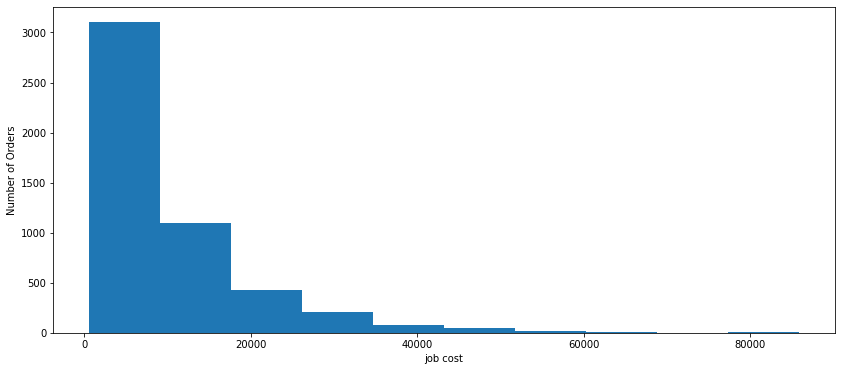

In [37]:
graph_work('JOB_COST')

Depth

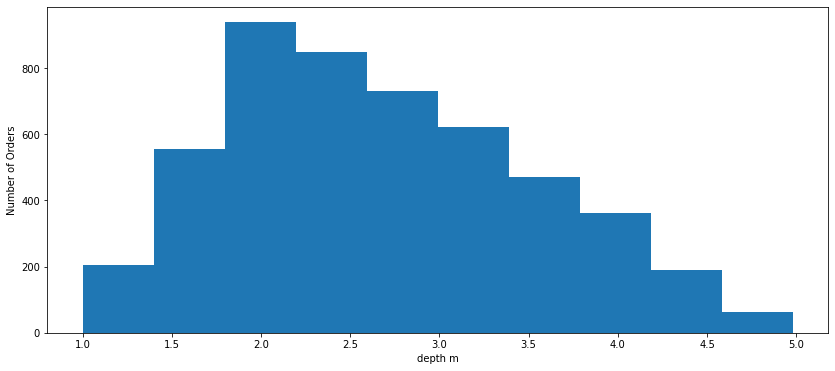

In [38]:
graph_work('DEPTH_M')

Diameter

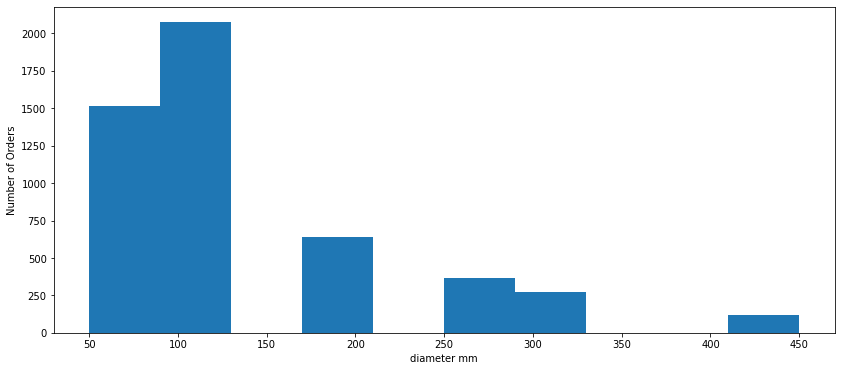

In [39]:
graph_work('DIAMETER_MM')

Length

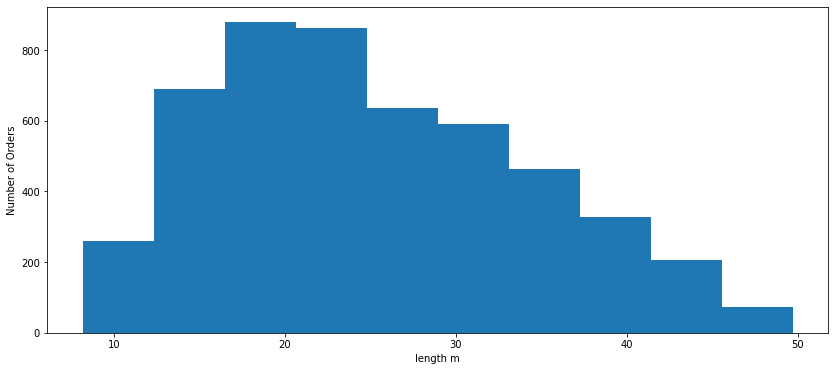

In [40]:
graph_work('LENGTH_M')

 **Categorical Columns**

Job Type

In [41]:
newdf['JOB_TYPE'].value_counts()

Replace    3501
Repair     1488
Name: JOB_TYPE, dtype: int64

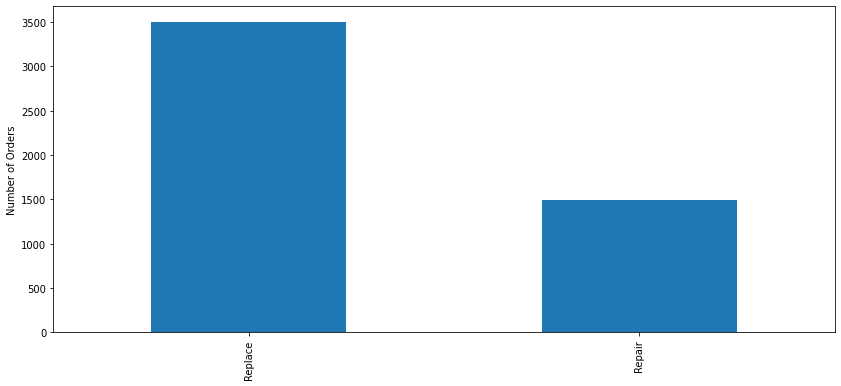

In [42]:
graph_work('JOB_TYPE')

Material

In [43]:
newdf['MATERIAL'].value_counts()

AC    2554
CI    1430
ST    1005
Name: MATERIAL, dtype: int64

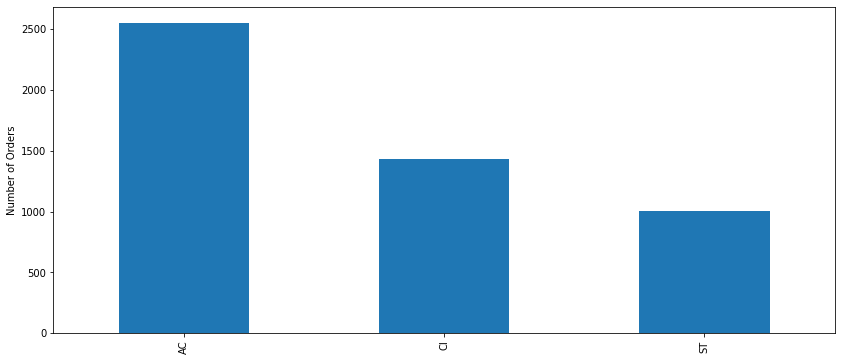

In [44]:
graph_work('MATERIAL')

# **Relations**

**Nuemrical Columns**

In [45]:
corr = newdf[['DEPTH_M','DIAMETER_MM','LENGTH_M','JOB_COST']].corr()
corr

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST
DEPTH_M,1.000000,0.007804,0.006343,0.342926
DIAMETER_MM,0.007804,1.000000,-0.001086,0.717744
LENGTH_M,0.006343,-0.001086,1.000000,0.179683
JOB_COST,0.342926,0.717744,0.179683,1.000000


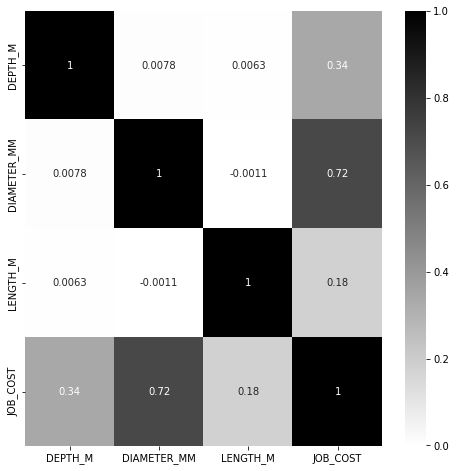

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='binary')
plt.show()

**Categorical Columns**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


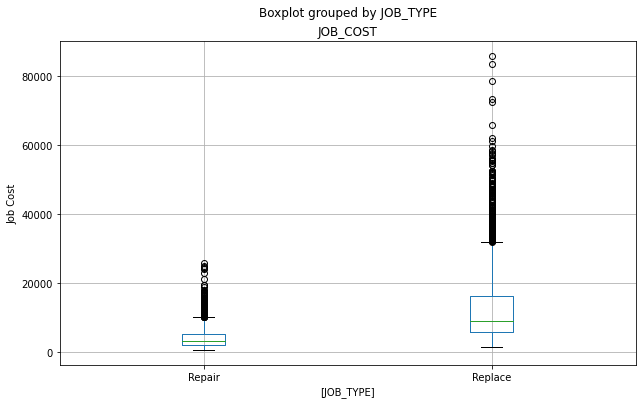

In [47]:
graph_work('JOB_TYPE',is_box = True)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


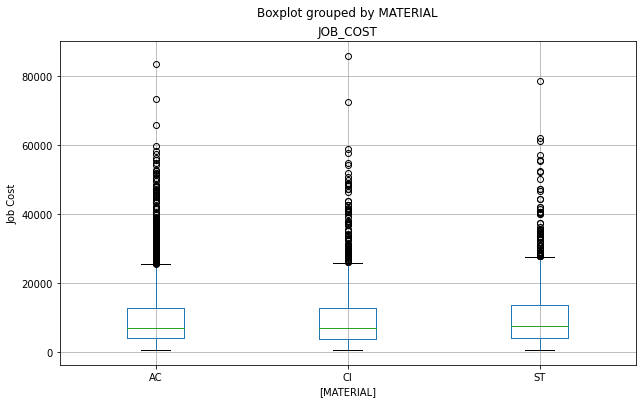

In [48]:
graph_work('MATERIAL', is_box = True)

# **Prediction**

**Train-Test Splitting**

In [49]:
from sklearn.model_selection import train_test_split
y = newdf.pop('JOB_COST')
X_train, X_test, y_train, y_test = train_test_split(newdf, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [50]:
numerical_cols = [cname for cname in newdf.columns if newdf[cname].dtype in ['int64', 'float64', 'float']]
X_train[numerical_cols].head()

,DEPTH_M,DIAMETER_MM,LENGTH_M
4376,2.23,450,27.13
3673,2.78,250,48.84
2013,4.62,90,18.56
3519,2.24,63,18.04
3776,2.46,50,24.54


**Preprocessing**

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

categorical_cols = [cname for cname in newdf.columns if newdf[cname].nunique() < 10 and 
                        newdf[cname].dtype == "object"]
numerical_cols = [cname for cname in newdf.columns if newdf[cname].dtype in ['int64', 'float64', 'float']]
OH_encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()
# Apply one-hot encoder to each column with categorical data
OH_train_cols= pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]))
scaled_train_cols = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]))
X_train = pd.concat([scaled_train_cols, OH_train_cols], axis=1)
OH_test_cols= pd.DataFrame(OH_encoder.transform(X_test[categorical_cols]))
scaled_test_cols = pd.DataFrame(scaler.transform(X_test[numerical_cols]))
X_test = pd.concat([scaled_test_cols, OH_test_cols], axis=1)

X_train = X_train.iloc[:, [x for x in range(0,4)]+ [x for x in range(5,8)]]
X_test = X_test.iloc[:, [x for x in range(0,4)]+ [x for x in range(5,8)]]

X_train.columns = ['DEPTH_M','DIAMETER_MM','LENGTH_M','IS_REPAIR','IS_ST','IS_AC','IS_CI']
X_test.columns = ['DEPTH_M','DIAMETER_MM','LENGTH_M','IS_REPAIR','IS_ST','IS_AC','IS_CI']

In [52]:
X_train.head()

,DEPTH_M,DIAMETER_MM,LENGTH_M,IS_REPAIR,IS_ST,IS_AC,IS_CI
0,-0.529885,3.567612,0.218713,0.0,1.0,0.0,0.0
1,0.117640,1.314983,2.600359,1.0,1.0,0.0,0.0
2,2.283907,-0.487120,-0.721439,0.0,1.0,0.0,0.0
3,-0.518112,-0.791225,-0.778484,0.0,0.0,1.0,0.0
4,-0.259102,-0.937646,-0.065417,0.0,1.0,0.0,0.0


**Hyperparameter Tuning and CV**

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, X_val ,y_val,
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=0
    )
    fitted_model = gs.fit(X_train_data, y_train_data, eval_set = (X_val,y_val))
    
    pred = fitted_model.predict(X_test_data)
    
    best_parameter = fitted_model.best_params_
    return fitted_model, pred,best_parameter

**LGB model**

In [54]:
import lightgbm as lgb
model = lgb.LGBMRegressor()

param_grid = {
    'n_estimators': [100,200,400],
    'colsample_bytree': [0.7],
    'max_depth': [4],
    'num_leaves': [10],
    'reg_alpha': [1.2],
    'reg_lambda': [1.2],
    'min_split_gain': [0.3],
    'subsample': [0.8],
    'subsample_freq': [20],
    'eval_metric' : ['l1'],
    'early_stopping_rounds' : [20,50,100]
}


model, pred, best_parameter = algorithm_pipeline(X_train, X_test, y_train, y_test,X_val,y_val, model,param_grid, cv=5, scoring_fit='neg_mean_squared_error')

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 8.63743e+07
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 7.51371e+07
[3]	valid_0's l2: 6.77896e+07
[4]	valid_0's l2: 5.96022e+07
[5]	valid_0's l2: 5.30649e+07
[6]	valid_0's l2: 5.12695e+07
[7]	valid_0's l2: 4.54467e+07
[8]	valid_0's l2: 4.05889e+07
[9]	valid_0's l2: 3.56168e+07
[10]	valid_0's l2: 3.21964e+07
[11]	valid_0's l2: 2.93556e+07
[12]	valid_0's l2: 2.78113e+07
[13]	valid_0's l2: 2.70416e+07
[14]	valid_0's l2: 2.47392e+07
[15]	valid_0's l2: 2.41777e+07
[16]	valid_0's l2: 2.1885e+07
[17]	valid_0's l2: 2.03068e+07
[18]	valid_0's l2: 1.96189e+07
[19]	valid_0's l2: 1.90689e+07
[20]	valid_0's l2: 1.86826e+07
[21]	valid_0's l2: 1.72661e+07
[22]	valid_0's l2: 1.56059e+07
[23]	valid_0's l2: 1.45385e+07
[24]	valid_0's l2: 1.39011e+07
[25]	valid_0's l2: 1.3096e+07
[26]	valid_0's l2: 1.19796e+07
[27]	valid_0's l2: 1.16005e+07
[28]	valid_0's l2: 1.07568e+07
[29]	valid_0's l2: 9.96305e+06
[30]	valid_0's l2: 9.43891e+06
[31]	valid_0's l2:

**Evaluate**

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

952.9955271055355 1550.8462534421421


**Importance**

Feature: 0, Score: 1056.00000
Feature: 1, Score: 730.00000
Feature: 2, Score: 982.00000
Feature: 3, Score: 253.00000
Feature: 4, Score: 103.00000
Feature: 5, Score: 84.00000
Feature: 6, Score: 50.00000


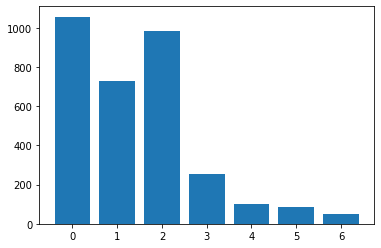

In [56]:
importance = model.best_estimator_.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Remove the last Feature and try again**

In [57]:
model = lgb.LGBMRegressor()
param_grid = {
    'n_estimators': [100,200,400],
    'colsample_bytree': [0.7],
    'max_depth': [4],
    'num_leaves': [10],
    'reg_alpha': [1.2],
    'reg_lambda': [1.2],
    'min_split_gain': [0.3],
    'subsample': [0.8],
    'subsample_freq': [20],
    'eval_metric' : ['l1'],
    'early_stopping_rounds' : [20,50,100]
}
model, pred, best_parameter = algorithm_pipeline(X_train[['DEPTH_M','DIAMETER_MM','LENGTH_M','IS_REPAIR','IS_ST','IS_AC']], X_test[['DEPTH_M','DIAMETER_MM','LENGTH_M','IS_REPAIR','IS_ST','IS_AC']], y_train, y_test,X_val[['DEPTH_M','DIAMETER_MM','LENGTH_M','IS_REPAIR','IS_ST','IS_AC']],y_val, model,param_grid, cv=5, scoring_fit='neg_mean_squared_error')

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 8.60027e+07
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 8.16922e+07
[3]	valid_0's l2: 7.0174e+07
[4]	valid_0's l2: 6.88002e+07
[5]	valid_0's l2: 6.60159e+07
[6]	valid_0's l2: 5.70096e+07
[7]	valid_0's l2: 4.97974e+07
[8]	valid_0's l2: 4.37362e+07
[9]	valid_0's l2: 4.29024e+07
[10]	valid_0's l2: 3.79215e+07
[11]	valid_0's l2: 3.64457e+07
[12]	valid_0's l2: 3.23144e+07
[13]	valid_0's l2: 3.15975e+07
[14]	valid_0's l2: 3.11091e+07
[15]	valid_0's l2: 2.7835e+07
[16]	valid_0's l2: 2.51261e+07
[17]	valid_0's l2: 2.45813e+07
[18]	valid_0's l2: 2.22869e+07
[19]	valid_0's l2: 2.16392e+07
[20]	valid_0's l2: 2.11457e+07
[21]	valid_0's l2: 1.87202e+07
[22]	valid_0's l2: 1.84762e+07
[23]	valid_0's l2: 1.65661e+07
[24]	valid_0's l2: 1.49288e+07
[25]	valid_0's l2: 1.37269e+07
[26]	valid_0's l2: 1.27577e+07
[27]	valid_0's l2: 1.2512e+07
[28]	valid_0's l2: 1.14718e+07
[29]	valid_0's l2: 1.07267e+07
[30]	valid_0's l2: 1.00928e+07
[31]	valid_0's l2: 

In [58]:
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

940.5539772184229 1517.832369607528


# Other Models

Ridge Linear Regression

In [59]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

2638.938087482891 3868.735433562264


Support Vector Regressor

In [60]:
from sklearn import svm
svr = svm.SVR(C= 20, epsilon= 0.008, gamma=0.0003)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

5858.182459487117 9271.225955452004


Neural Network

In [61]:
from tensorflow import keras
from keras.layers import Dense
model = keras.Sequential()
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=0,
        validation_data=(X_val,y_val))
pred = model.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

32/32 [==============================] - 0s 1ms/step
9845.948853738897 13266.704614752678


XGBoost

In [62]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimator=400, colsample_bytree=0.7, max_depth=4, reg_alpha=1.2, reg_lambda = 1.2, min_split_gain=0.3, subsample = 0.8, subsample_freq=20)
xgb.fit(X_test,y_test)
pred = xgb.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

[01:01:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
737.8331180099689 1095.7649407134745


K-Nearest Neighbourhood

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
pred = knn_model.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)
print(mae,mse)

1451.1005252851103 3045.13010441048
